## Working with Multi-Year ACS Data

The censusdis package only supports downloading data one year at a time. Since I am interested in analyzing trends over time, I wrote three functions to make it easier to work with what I call "multi-year ACS data". The functions are `download_multiyear`, `graph_multiyear` and `pct_change_multiyear`. This notebook demonstrates their usage.

As I mentioned in [02-geographic-stability.ipynb](./02-geographic-stability.ipynb), the first ACS 5-year estimates were published in 2009 and the last were published in 2023. You are not supposed to compare years with overlapping data. So I will chose to compare the first, last and midpoint (2016). For this workbook I will be using two tables: [B05012: Nativity in the United States](https://data.census.gov/table/ACSDT5Y2020.B05012?g=9700000US3612510) and [B05006: Place of Birth for the Foreign-born Population in the United States](https://censusreporter.org/data/table/?table=B05006&geo_ids=97000US3612510&primary_geo_id=97000US3612510).

As a reminder, all code in this repo (including `utils.py`) is open source and released under the MIT License. Feel free to use it for your own project.

As my purpose here is to demonstrate code, I will not be providing any analysis or commentary on the data itself.

### Downloading Multiple Years of ACS Data 

The API to `download_multiyear` is designed to mirror that of `ced.download`, which was introduced in the previous notebook. The principal difference is that the second parameter is now a list of years (for ced.download it is a single year).

In [1]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2016, 2023],
    group="B05012",
    state=NY,
    school_district_unified="12510",
)
df

...

,Total,Native,Foreign-born,Year
0,44953,31623,13330,2009
0,45310,30885,14425,2016
0,47891,32414,15477,2023


Addditional Parameters:
  * `rename_vars=True`. If True then rename the columns from variables to labels. The labels from the last year are used. Only the last portion of the label (`!!` is a separator) is used and any trailing `:` is dropped.
  * `drop_cols=True`. If True then drops columns which do not contain survey data. This tends to be geographic metadata.
  * `prompt=True`. download_multiyear emits a warning if a variable’s label changed during the selected years. If prompt is True then users are also prompted to confirm that they want to continue with the download despite the label mismatch. In order to reduce false positives `:` is removed when doing the comparison (e.g. “Total:” and “Total” are considered identical).

I first learned that ACS variables can change meaning when doing my [Covid Demographics Explorer](https://arilamstein.com/covid-demographics-explorer/) project. As I described in [this](https://arilamstein.com/blog/2024/05/28/creating-time-series-data-from-the-american-community-survey-acs/) blog post, the variable B08006_017E changed from “Estimate!!Total!!Motorcycle” in 2005 to “Estimate!!Total!!Worked at home” in 2006.

### group vs. download_variables

The above example showed how to download the contents of an entire table using the `group` parameter. However, some tables (such as `B05006`) have over a hundred variables. In those cases it is more convenient to download just a handful of the variables from the table. To do that we can use the `download_variables` parameter, and give it just a list of variables:

In [3]:
download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2016, 2023],
    download_variables=["B05006_049E", "B05006_054E"],
    state=NY,
    school_district_unified="12510",
)

...

,China,Korea,Year
0,1543,857,2009
0,3012,865,2016
0,4172,1425,2023


Note that in download_multiyear exactly one of `group` and `download_variables` must be specified. 

### Graphing Multiple Years of ACS Data

The above dataframe can be easily graphed with the function `graph_multiyear`:

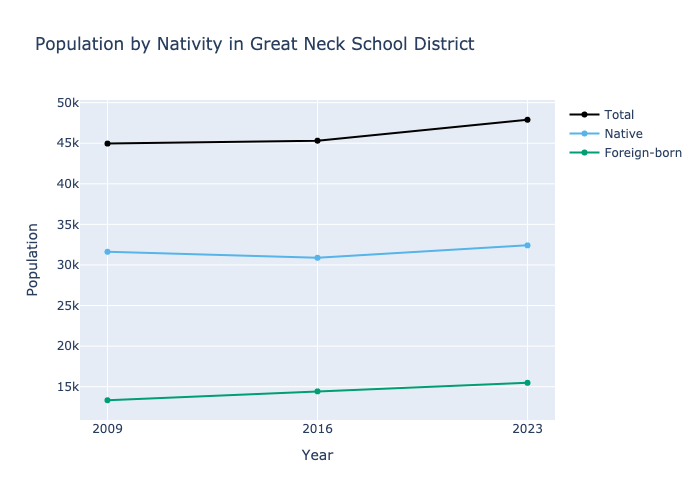

In [ ]:
from utils import graph_multiyear

graph_multiyear(
    df=df,
    title="Population by Nativity<br>Great Neck School District, NY",
    yaxis_title="Population",
)

These graphs will render interactively on your local machine. However, github can only render them as static images. 

There is an optional parameter `y_cols` that allows you to render only a portion of the data:

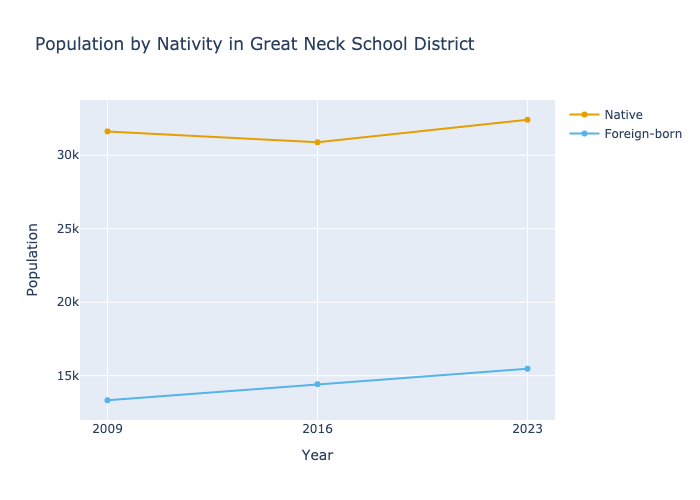

In [ ]:
graph_multiyear(
    df=df,
    title="Population by Nativity<br>Great Neck School District, NY",
    yaxis_title="Population",
    y_cols=["Native", "Foreign-born"],
)

### Graphing Percent Change

While Pandas has a function `pct_change`, it is difficult to use on our dataset because it works on all columns (including the "Year" column). Since I anticipate doing this operation multiple times in this analysis (including boilerplate code like rounding the result), I wrote the function `pct_change_multiyear`:

   Total  Native  Foreign-born  Year
0    NaN     NaN           NaN  2009
0    0.8    -2.3           8.2  2016
0    5.7     5.0           7.3  2023


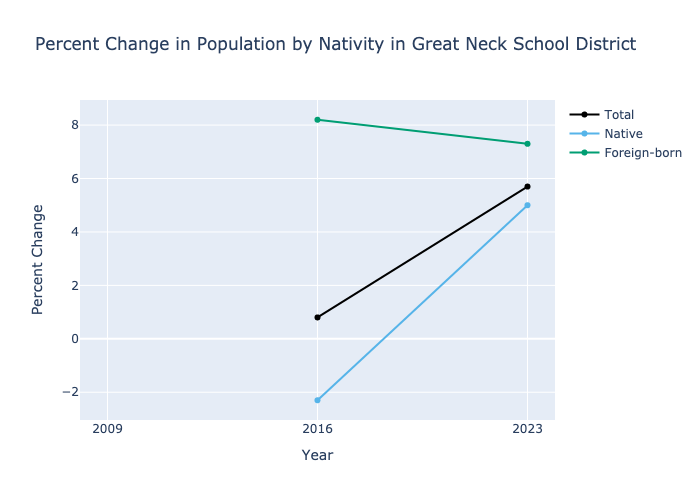

In [ ]:
from utils import pct_change_multiyear

df = pct_change_multiyear(df)
print(df)

graph_multiyear(
    df=df,
    title="Percent Change in Population by Nativity<br>Great Neck School District, NY",
    yaxis_title="Percent Change",
)